In [1]:
from PIL import Image

In [13]:
imdir = '/Users/matthewgordon/repo/never_forget/xinjiang_data/processed_images/'
im1 = Image.open(imdir + '1771.bmp')
im2 = Image.open(imdir + '1772.bmp')
im2.size, im2.mode


((240, 240), 'RGB')

In [14]:
im_black = Image.new(mode=im2.mode, size=im2.size)

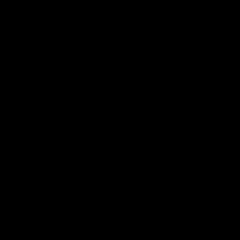

In [15]:
im_black

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

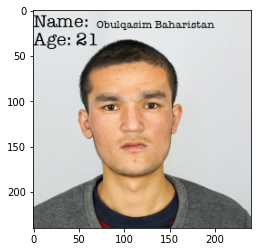

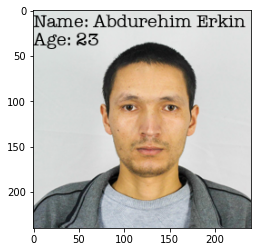

In [19]:
plt.figure()
plt.imshow(im1)
plt.figure()
plt.imshow(im2)

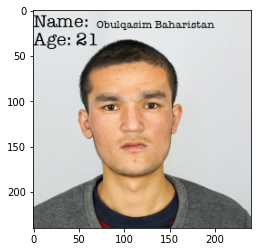

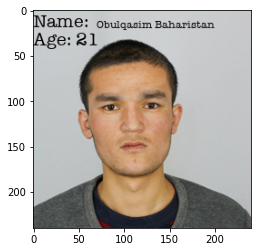

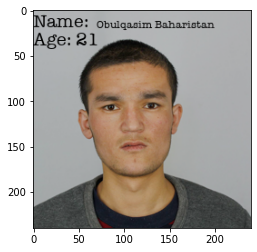

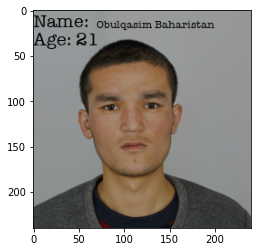

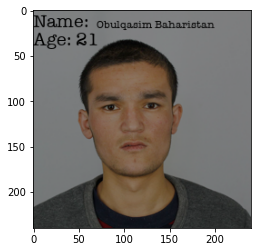

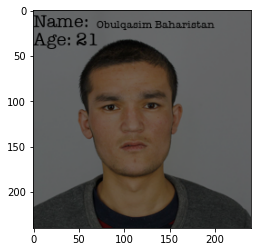

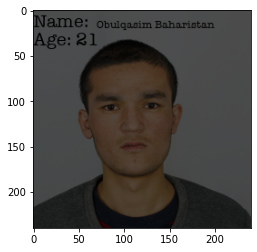

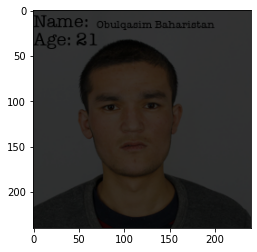

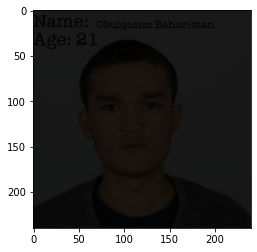

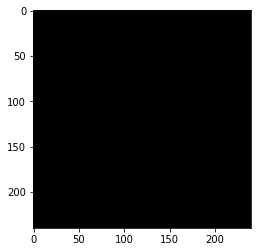

In [24]:
FADE_STEPS = 10
for n in range(FADE_STEPS):
    alpha = n/(FADE_STEPS - 1)
    plt.figure()
    plt.imshow(Image.blend(im1, im_black, alpha))
    

In [33]:
class Fader:
    def __init__(self, im1, im2, fade_steps=20):
        self.im1 = im1
        self.im2 = im2
        self.im_black = Image.new(mode=im1.mode, size=im1.size)
        self.fade_steps = fade_steps
        self.max_step = int(fade_steps / 2)
        self.n = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.n > self.fade_steps:
            raise StopIteration
        self.n += 1
        if self.n <= self.max_step:
            return Image.blend(self.im1, self.im_black, alpha=(self.n - 1)/(self.max_step - 1))
        else:
            return Image.blend(self.im_black, self.im2, alpha=(self.n - self.max_step)/(self.max_step - 1))
                    
            
            
        
        

/var/folders/pr/wks19cv12rd77gf8n5xvfyn40000gq/T/ipykernel_5854/2438196255.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


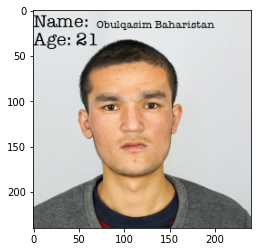

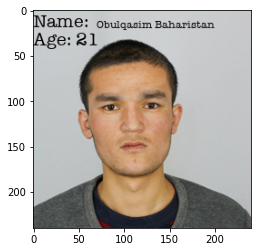

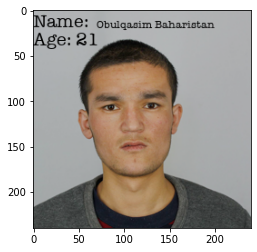

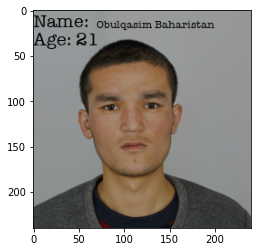

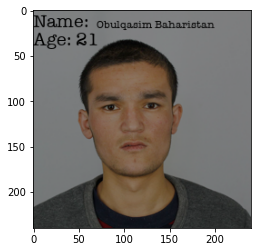

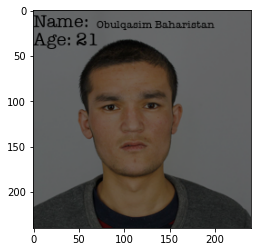

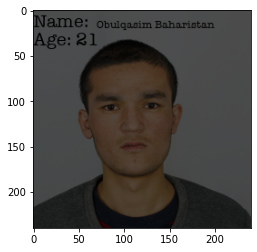

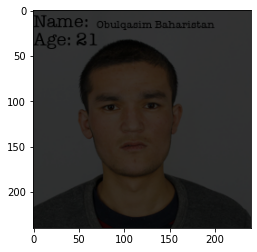

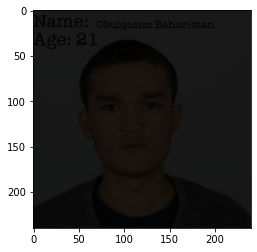

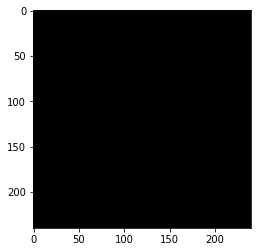

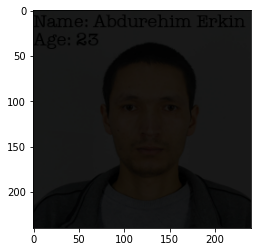

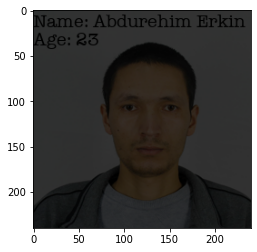

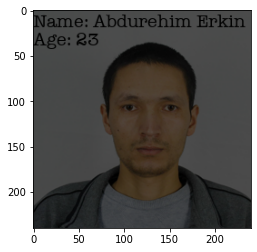

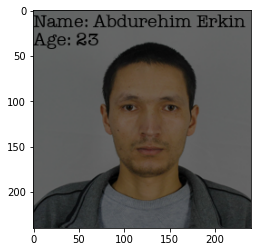

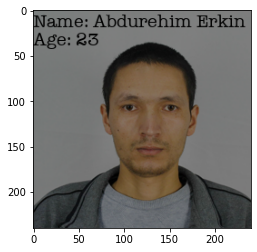

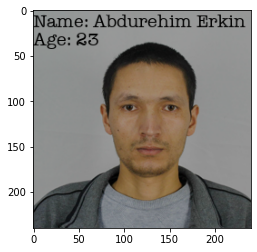

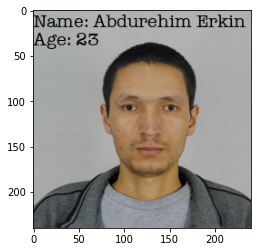

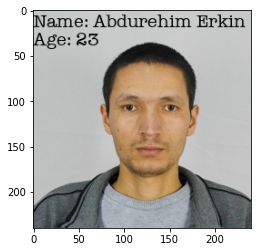

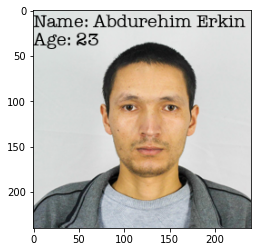

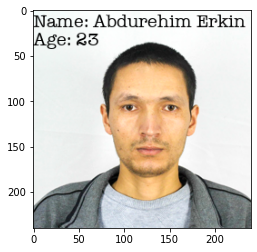

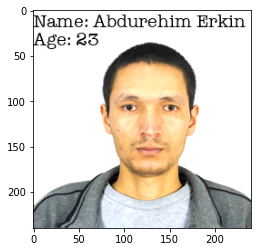

In [34]:
fade_iter = Fader(im1, im2)
for im in fade_iter:
    plt.figure()
    plt.imshow(im)